In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
zip_ref=zipfile.ZipFile("10_food_classes_10_percent.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-07-31 06:18:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   181MB/s    in 0.9s    

2023-07-31 06:18:14 (181 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE=(224, 224)
BATCH_SIZE=32
train_dir="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import datetime
import tensorflow as tf
def create_tensorboard_callback(dir_name,experiment_name):
  log_dir=dir_name+"/"+experiment_name+"/"+datetime.datetime.now().strftime("%Y%M%D-%H%M%S")
  tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving tensorBoard log files to {log_dir}")
  return tensorboard_callback

In [ ]:
#comapring tensorflow hub models
resnet_url="https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url="https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
#dependencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
def create_model(model_url,num_classes=10):
  feature_extraction_layer=hub.KerasLayer(model_url,trainable=False,input_shape=IMAGE_SHAPE+(3,))
  #create the model
  model=tf.keras.Sequential([
    feature_extraction_layer,
    layers.Dense(num_classes,activation="softmax")
  ])
  return model

In [ ]:
resnet_model=create_model(resnet_url,num_classes=train_data_10_percent.num_classes)

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
resnet_model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
resnet_history=resnet_model.fit(train_data_10_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data,
                                validation_steps=len(test_data),
                                callbacks=[create_tensorboard_callback(dir_name="TensorFlow_hub",experiment_name="ResnetV250")])

Saving tensorBoard log files to TensorFlow_hub/ResnetV250/20233007/31/23-053004
Epoch 1/5
24/24 [==============================] - 462s 20s/step - loss: 0.8852 - accuracy: 0.7373 - val_loss: 0.8463 - val_accuracy: 0.7360
Epoch 2/5
24/24 [==============================] - 491s 21s/step - loss: 0.6134 - accuracy: 0.8227 - val_loss: 0.7243 - val_accuracy: 0.7752
Epoch 3/5
24/24 [==============================] - 485s 21s/step - loss: 0.4740 - accuracy: 0.8760 - val_loss: 0.6913 - val_accuracy: 0.7812
Epoch 4/5
24/24 [==============================] - 447s 19s/step - loss: 0.3818 - accuracy: 0.9067 - val_loss: 0.6768 - val_accuracy: 0.7844
Epoch 5/5
24/24 [==============================] - 485s 21s/step - loss: 0.3201 - accuracy: 0.9293 - val_loss: 0.6388 - val_accuracy: 0.7916


In [ ]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))
  plt.plot(epochs,loss,label="traning_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label="traning_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

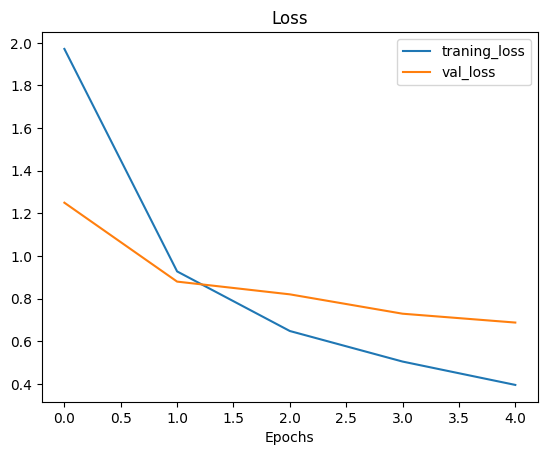

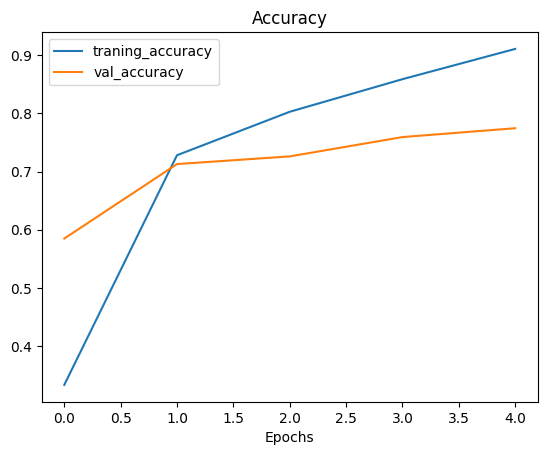

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
efficientnet_model=create_model(model_url=efficientnet_url,num_classes=train_data_10_percent.num_classes)
efficientnet_model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics="accuracy")
efficientnet_history=efficientnet_model.fit(train_data_10_percent,
                                            epochs=5,
                                            steps_per_epoch=len(train_data_10_percent),
                                            validation_data=test_data,
                                            validation_steps=len(test_data),
                                            callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",experiment_name="efficientnetB0")])

Saving tensorBoard log files to tensorflow_hub/efficientnetB0/20232307/31/23-062341
Epoch 1/5
24/24 [==============================] - 34s 587ms/step - loss: 1.8588 - accuracy: 0.4133 - val_loss: 1.3139 - val_accuracy: 0.7328
Epoch 2/5
24/24 [==============================] - 11s 466ms/step - loss: 1.0547 - accuracy: 0.7920 - val_loss: 0.8728 - val_accuracy: 0.8228
Epoch 3/5
24/24 [==============================] - 11s 454ms/step - loss: 0.7503 - accuracy: 0.8400 - val_loss: 0.6961 - val_accuracy: 0.8448
Epoch 4/5
24/24 [==============================] - 11s 452ms/step - loss: 0.6010 - accuracy: 0.8760 - val_loss: 0.6112 - val_accuracy: 0.8568
Epoch 5/5
24/24 [==============================] - 11s 486ms/step - loss: 0.5105 - accuracy: 0.8973 - val_loss: 0.5550 - val_accuracy: 0.8616


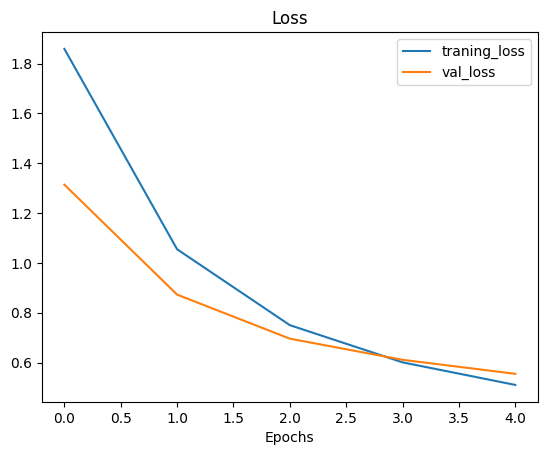

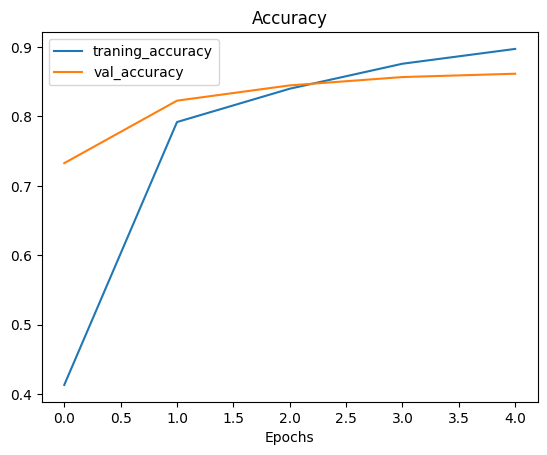

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              4049564   
                                                                 
 dense_1 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
#comparison of models is more convinient using tensorBoard

In [ ]:
#upload log files to tensorBoard
# !tensorboard dev upload --logdir ./tensorflow_hub/ \
# --name "EfficientNetB0 vs ResNet50V2" \
# --description "Compare two different TF hub feature extraction model architectures"
# -- one_shot

#to check all tensorBoard Experiments
#!tensorboard dev list

#to delete an experiment we use
#!tensorboard dev delete --experiment_id <actual id>